In [68]:
%matplotlib inline
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
import time

In [59]:
## set Parameters
sigma = 8e-2 ;  #noise level
tol = 1e-6 ; # |u_(k+1)-u_k| < tol
TVtype = 2 ; # 1 : anisotropic TV, 2 : isotropic TV 

## SB parameter
lambda_sb = 10 ;
maxiter_sb = 100 ;
gamma_sb = 5

In [135]:
image1 = image.imread("lena.jpg")

In [139]:
image1=image1/255

In [178]:
def add_noise(im):
    size = im.shape
    gauss = np.random.normal(0,sigma,size)
    print(gauss)
    im = im+gauss
    return im

In [179]:
image1= add_noise(image2)

[[-0.0510259  -0.29924461  0.00241438 ... -0.01635737 -0.14840117
  -0.0262383 ]
 [ 0.06937374  0.07952447 -0.03414915 ... -0.02600353 -0.05952301
   0.16711813]
 [ 0.05570557 -0.06754464 -0.00684254 ...  0.17043257 -0.01771947
   0.06303323]
 ...
 [-0.04167995 -0.06479583 -0.04823684 ... -0.01069453  0.10415186
   0.01290135]
 [ 0.01495536 -0.03506999  0.1539904  ...  0.02473323  0.02951953
  -0.06655068]
 [-0.02115872  0.11994519 -0.17952145 ...  0.03689932 -0.02049154
  -0.00050722]]


In [184]:
def tv_sb(im ,lam_sb=10 ,tol = 1e-6 , maxiter=100 , gamma_sb=5):
    a,b = im.shape ##圖片大小
    imu = np.array([0]+[i for i in range(a-1)])
    imd = np.array([i+1 for i in range(a-1)]+[a-1])
    iml = np.array([0]+[i for i in range(b-1)])
    imr = np.array([i+1 for i in range(b-1)]+[b-1])
    
    ##initial condition
    u = im

    bx = np.zeros([a,b])
    by = np.zeros([a,b])
    dx = np.zeros([a,b])
    dy = np.zeros([a,b])
    
    it = 0;  #interative times
    error = 100;  #relative error

    while it < maxiter and error >= tol :
        ##u-subproblem
        alpha = lam_sb / gamma_sb;
        d_bx = dx-bx;
        d_by = dy-by;
        u_new = (alpha*im - d_bx + d_bx[:,iml] - d_by + d_by[imu,:] + u[imu,:] + u[imd,:] + u[:,iml] + u[:,imr] + 4*u )/(alpha + 8);
        
        ##d-subproblem
       
        ux = np.concatenate((np.diff(u,1,1), np.zeros([a,1])),axis=1);
        uy = np.concatenate((np.diff(u,1,0),np.zeros([1,b])));
        wx = ux + bx;
        wy = uy + by;
        x = abs(wx)-1/gamma_sb
        x[x<0]=0
        dx = np.sign(wx)* x;
        y = abs(wy)-1/gamma_sb
        y[y<0]=0
        dy = np.sign(wy)* y;
        bx = bx + ux - dx;
        by = by + uy - dy;
        #relative error
        error =np.sum((u_new-u)*(u_new-u))/np.sum(u*u)
        it = it + 1;
        u = u_new;
    print("Iteration complete!!")
    print("Iteration time :",it)
    return u,it

In [185]:
ts = time.time()
new_image,it = tv_sb(image3)
te = time.time()
print("time",round(te-ts,2))

Iteration complete!!
Iteration time : 37
time 3.6


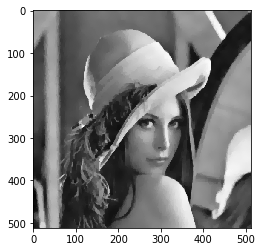

In [186]:
plt.imshow(new_image,cmap="gray")